In [1]:
import joblib
import pandas as pd
from quadratic_weighted_kappa import quadratic_weighted_kappa
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
scores = pd.read_csv('../training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
y =  joblib.load('score_asap5')
model_score = joblib.load('score_model_normalized')

In [3]:
scores = scores[scores['essay_set'] == 5]
scores = scores[['rater1_domain1', 'rater2_domain1', 'rater3_domain1']]
len(scores)

1805

In [4]:
scores

,rater1_domain1,rater2_domain1,rater3_domain1
7081,2,2,NaN
7082,2,2,NaN
7083,3,3,NaN
7084,1,0,NaN
7085,2,3,NaN
...,...,...,...
8881,2,1,NaN
8882,0,0,NaN
8883,3,4,NaN
8884,3,2,NaN


### Check how many rater3 involved (measuring disagreement between rater 1 and rater 2)

In [5]:
scores.count()

rater1_domain1    1805
rater2_domain1    1805
rater3_domain1       0
dtype: int64

### first reset dataframe index to avoid NaN

In [6]:
scores = scores.reset_index()

In [7]:
scores = scores[['rater1_domain1', 'rater2_domain1']]
scores['model_score'] = model_score
scores['y'] = y
scores

,rater1_domain1,rater2_domain1,model_score,y
0,2,2,3.0,2
1,2,2,3.0,2
2,3,3,3.0,3
3,1,0,1.0,1
4,2,3,3.0,3
...,...,...,...,...
1800,2,1,3.0,2
1801,0,0,0.0,0
1802,3,4,4.0,4
1803,3,2,3.0,3


In [8]:
quadratic_weighted_kappa(y, model_score)

0.8071648979632827

In [9]:
pearsonr(y, model_score)

(0.8089879301036437, 0.0)

In [10]:
quadratic_weighted_kappa(scores['rater1_domain1'], scores['rater2_domain1'])

0.7526961695797694

In [11]:
pearsonr(scores['rater1_domain1'], scores['rater2_domain1'])

(0.7527010280573941, 0.0)

In [8]:
rater1_score = scores['rater1_domain1']
rater2_score = scores['rater2_domain1']

In [13]:
print(y)

0       2
1       2
2       3
3       1
4       3
       ..
1800    2
1801    0
1802    4
1803    3
1804    2
Name: domain1_score, Length: 1805, dtype: int64


In [14]:
#scores.to_excel('asap6_summary.xlsx')

In [15]:
discrepancy_r1r2 = rater1_score == rater2_score
type(discrepancy_r1r2)

pandas.core.series.Series

In [16]:
diff = rater1_score - rater2_score
diff_abs = list(map(abs, diff))
diff

0       0
1       0
2       0
3       1
4      -1
       ..
1800    1
1801    0
1802   -1
1803    1
1804    0
Length: 1805, dtype: int64

In [17]:
diff_abs[-5:]

[1, 0, 1, 1, 0]

In [18]:
scores['diff_r1r2'] = diff_abs
scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2
0,2,2,3.0,2,0
1,2,2,3.0,2,0
2,3,3,3.0,3,0
3,1,0,1.0,1,1
4,2,3,3.0,3,1
...,...,...,...,...,...
1800,2,1,3.0,2,1
1801,0,0,0.0,0,0
1802,3,4,4.0,4,1
1803,3,2,3.0,3,1


In [19]:
diff_y_model = model_score - y
diff_y_model_abs = list(map(abs, diff_y_model))
diff_y_model

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1800    1.0
1801    0.0
1802    0.0
1803    0.0
1804    0.0
Name: domain1_score, Length: 1805, dtype: float64

In [20]:
diff_y_model_abs = list(map(int, diff_y_model_abs))
diff_y_model_abs[-3:]

[0, 0, 0]

In [21]:
scores['diff_model_y'] = diff_y_model_abs
scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
0,2,2,3.0,2,0,1
1,2,2,3.0,2,0,1
2,3,3,3.0,3,0,0
3,1,0,1.0,1,1,0
4,2,3,3.0,3,1,0
...,...,...,...,...,...,...
1800,2,1,3.0,2,1,1
1801,0,0,0.0,0,0,0
1802,3,4,4.0,4,1,0
1803,3,2,3.0,3,1,0


In [22]:
scores.to_excel('asap5_summary.xlsx')

In [23]:
diff_r1r2 = list(scores['diff_r1r2'])
diff_model_y = list(scores['diff_model_y'])

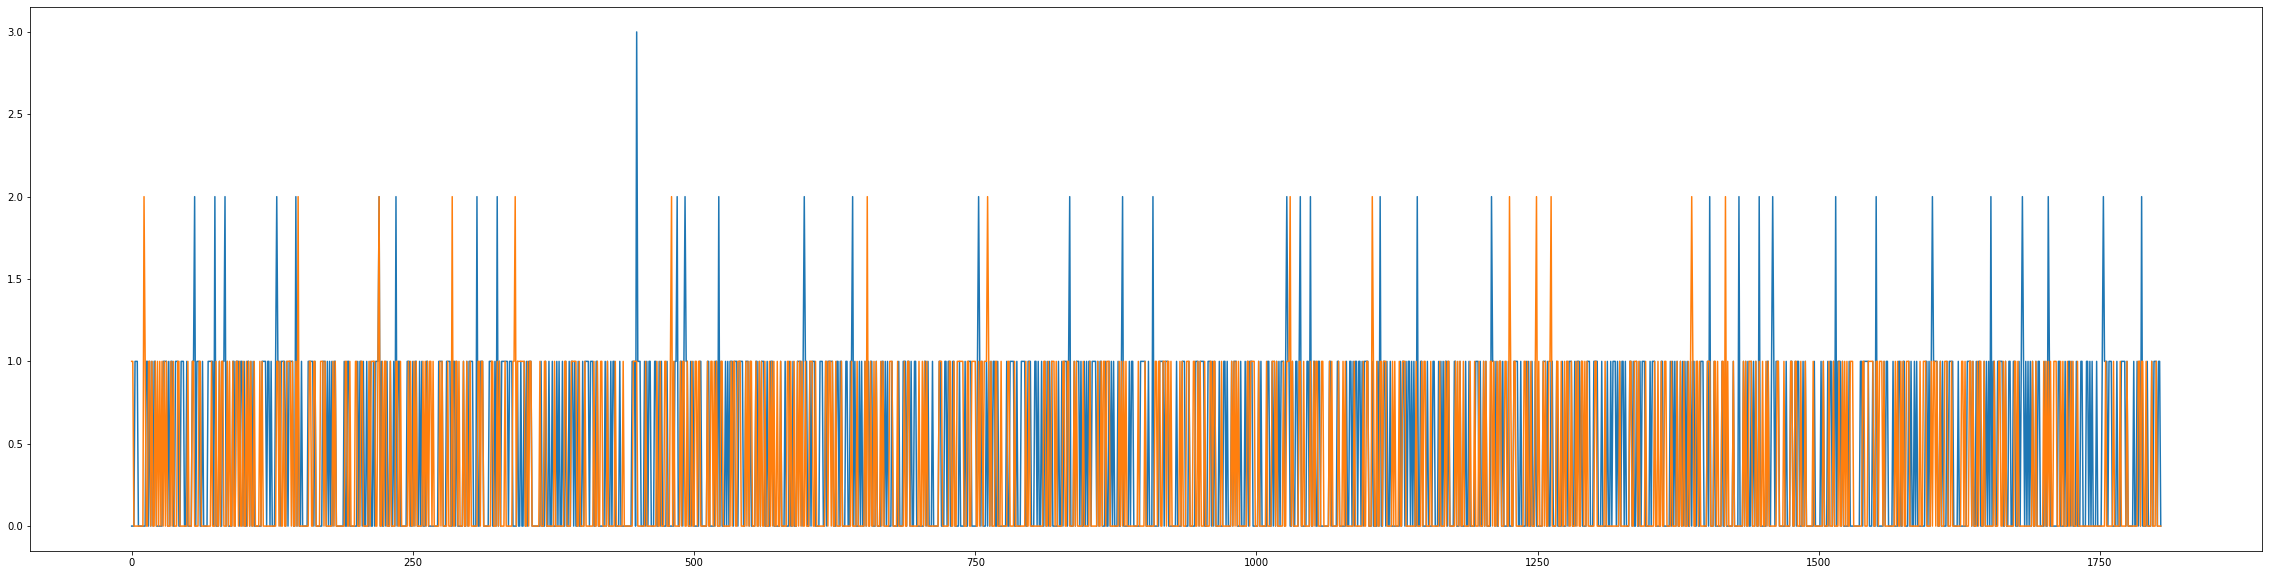

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,10))
plt.plot(diff_r1r2)
plt.plot(diff_model_y)
plt.show()

In [25]:
diff = np.array(diff_r1r2) - np.array(diff_model_y)
diff_abs = list(map(abs,diff))
diff

array([-1, -1,  0, ...,  1,  1,  0])

In [26]:
diff_abs[-3:]

[1, 1, 0]

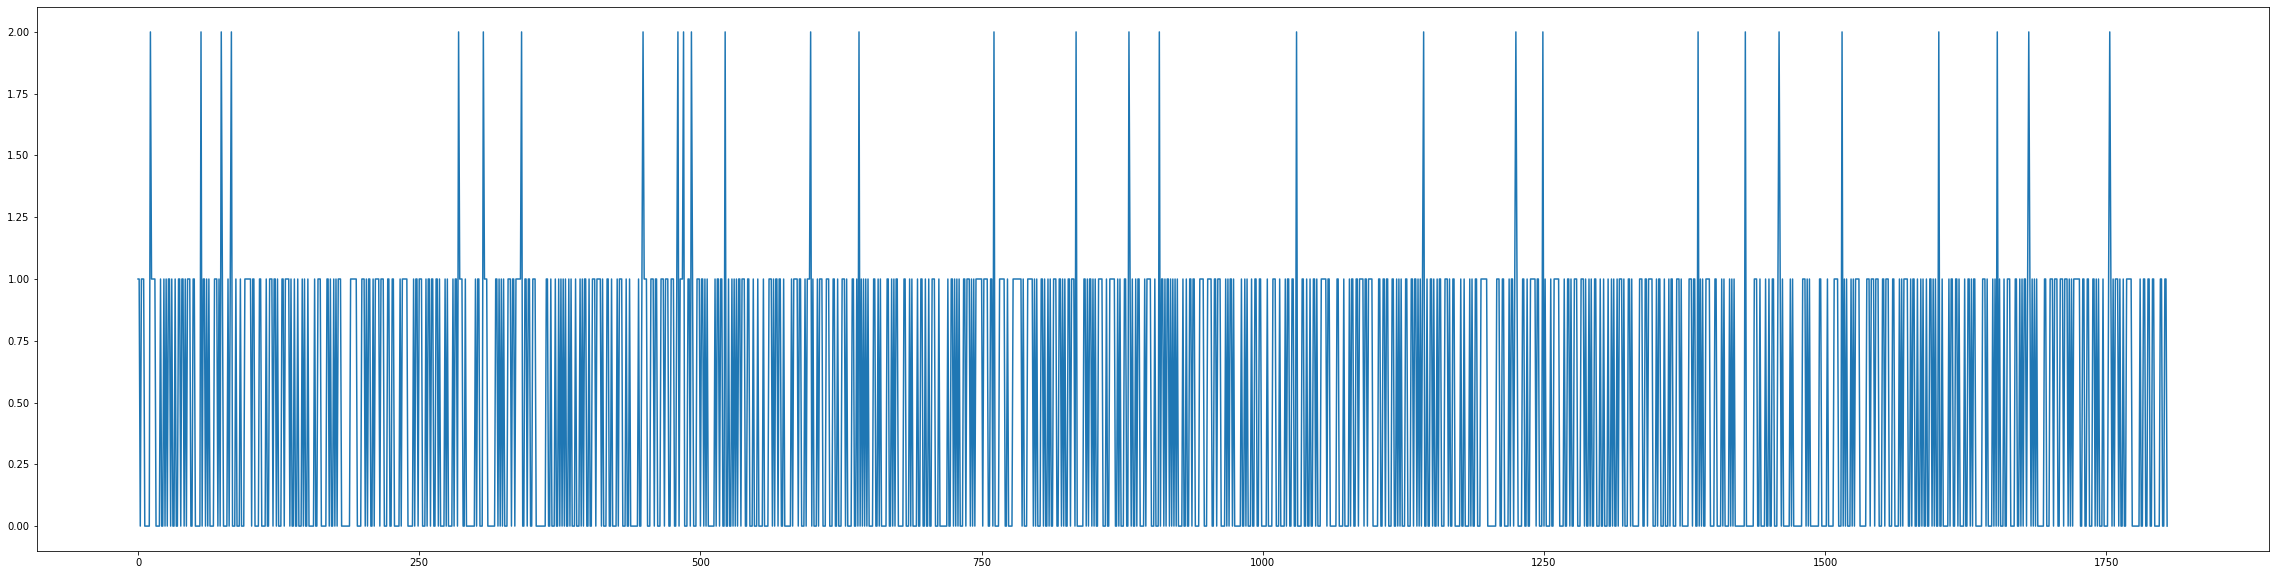

In [27]:
plt.figure(figsize=(40,10))
plt.plot(diff_abs)
plt.show()

In [28]:
from collections import Counter
Counter(diff_abs)

Counter({1: 784, 0: 991, 2: 30})

In [29]:
bad_scores = scores[scores['diff_model_y'] != 0]
good_scores = scores[scores['diff_model_y'] == 0]

In [30]:
bad_scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
0,2,2,3.0,2,0,1
1,2,2,3.0,2,0,1
11,1,1,3.0,1,0,2
12,1,1,2.0,1,0,1
15,2,2,3.0,2,0,1
...,...,...,...,...,...,...
1787,1,3,3.0,2,2,1
1788,1,1,2.0,1,0,1
1791,2,2,3.0,2,0,1
1796,2,1,1.0,2,1,1


In [31]:
Counter(bad_scores['diff_r1r2'])

Counter({0: 303, 1: 252, 2: 16, 3: 1})

In [32]:
good_scores

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
2,3,3,3.0,3,0,0
3,1,0,1.0,1,1,0
4,2,3,3.0,3,1,0
5,2,3,3.0,3,1,0
6,3,3,3.0,3,0,0
...,...,...,...,...,...,...
1799,2,3,3.0,3,1,0
1801,0,0,0.0,0,0,0
1802,3,4,4.0,4,1,0
1803,3,2,3.0,3,1,0


In [33]:
Counter(good_scores['diff_r1r2'])

Counter({0: 743, 1: 470, 2: 20})

## Passing, Borderline, Failing
#### 0,1 failing
#### 2 bordeline
#### 3-4 passing

In [9]:
Counter(rater1_score)

Counter({2: 695, 3: 486, 1: 377, 4: 196, 0: 51})

In [10]:
r1 = dict(Counter(rater1_score))

rater1_score_passing = r1[3] + r1[4]
rater1_score_borderline = r1[2]
rater1_score_failing = r1[0] + r1[1]

total = rater1_score_passing + rater1_score_borderline + rater1_score_failing
total

1805

In [11]:
Counter(rater2_score)

Counter({2: 649, 3: 518, 0: 47, 4: 189, 1: 402})

In [12]:
r2 = dict(Counter(rater2_score))

rater2_score_passing = r2[3] + r2[4]
rater2_score_borderline = r2[2]
rater2_score_failing = r2[0] + r2[1]

total = rater2_score_passing + rater2_score_borderline + rater2_score_failing
total

1805

In [13]:
Counter(model_score)

Counter({3.0: 593, 1.0: 272, 4.0: 235, 2.0: 698, 0.0: 7})

In [14]:
m = dict(Counter(model_score))

model_score_passing = m[3] + m[4]
model_score_borderline = m[2]
model_score_failing = m[0] + m[1]

total = model_score_passing + model_score_borderline + model_score_failing
total

1805

In [45]:
print("Passing")
print("rater1_score: ", rater1_score_passing)
print("rater2_score: ", rater2_score_passing)
print("model_score: ", model_score_passing)

Passing
rater1_score:  682
rater2_score:  707
model_score:  828


In [46]:
print("Borderline")
print("rater1_score: ", rater1_score_borderline)
print("rater2_score: ", rater2_score_borderline)
print("model_score: ", model_score_borderline)

Borderline
rater1_score:  695
rater2_score:  649
model_score:  698


In [47]:
print("Failing")
print("rater1_score: ", rater1_score_failing)
print("rater2_score: ", rater2_score_failing)
print("model_score: ", model_score_failing)

Failing
rater1_score:  428
rater2_score:  449
model_score:  279


## Quantitative Assessment of AES Model

## z must be lower than 0.15

In [13]:
human1_score = np.array(rater1_score)
human2_score = np.array(rater2_score)

In [14]:
human2_score

array([2, 2, 3, ..., 4, 2, 2], dtype=int64)

In [15]:
model_mean = np.mean(model_score)
print(model_mean)
y_mean = np.mean(y)
print(y_mean)
mean_diff = abs(model_mean-y_mean)
print(mean_diff)

2.4304709141274237
2.4088642659279778
0.02160664819944591


In [16]:
model_variance = np.var(model_score)
print(model_variance)
y_variance = np.var(y)
print(y_variance)

0.8302072574642613
0.941971286285403


In [17]:
z = mean_diff / np.sqrt((model_variance + y_variance)/2)
z

0.022953486493796017

## Statistics

### mean

In [53]:
print("Mean Human-1 score: ", np.mean(human1_score))
print("Mean Human-2 score: ", np.mean(human2_score))
print("Mean model score: ", np.mean(model_score))
print("Mean label: ", np.mean(y))

Mean Human-1 score:  2.221052631578947
Mean Human-2 score:  2.221606648199446
Mean model score:  2.4304709141274237
Mean label:  2.4088642659279778


### Standard Deviation

In [54]:
print("SD Human-1 score: ", np.std(human1_score))
print("SD Human-2 score: ", np.std(human2_score))
print("SD model score: ", np.std(model_score))
print("SD label: ", np.std(y))

SD Human-1 score:  0.9882411136028284
SD Human-2 score:  0.9917547449259949
SD model score:  0.9111570981253788
SD label:  0.970552052331766


### summary

In [55]:
scores.describe()

,rater1_domain1,rater2_domain1,model_score,y,diff_r1r2,diff_model_y
count,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000,1805.000000
mean,2.221053,2.221607,2.430471,2.408864,0.441551,0.325208
std,0.988515,0.992030,0.911410,0.970821,0.538477,0.486003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000


### ANOVA test

In [56]:
# Test if data have the same means
from scipy.stats import f_oneway
f_oneway(human1_score, human2_score)

F_onewayResult(statistic=0.00028247640993151987, pvalue=0.9865914872275038)

### t test

In [57]:
from scipy.stats import ttest_ind, ttest_rel
ttest_ind(human1_score, model_score)

Ttest_indResult(statistic=-6.617203388458114, pvalue=4.201248122602325e-11)

### normality test

In [58]:
from scipy.stats import normaltest
normaltest(human1_score)

NormaltestResult(statistic=44.114500647067366, pvalue=2.6342555185205343e-10)

In [59]:
from scipy.stats import shapiro
shapiro(human1_score)

(0.9045463800430298, 3.615822092497295e-32)

### skewness

In [60]:
from scipy.stats import skew
skew(human1_score)

0.04620270985035907

In [61]:
from scipy.stats import kurtosis
kurtosis(human1_score)

-0.5472079893936921

### Levene (equality of variance)

In [62]:
from scipy.stats import levene
levene(model_score, y)

LeveneResult(statistic=4.7089611900360175, pvalue=0.030070822393472783)

### Kruskall-Wallis (test if median of all groups are equal)

In [63]:
from scipy.stats import kruskal
kruskal(human1_score, human2_score, model_score)

KruskalResult(statistic=52.15619605740678, pvalue=4.725262368954525e-12)

In [64]:
a = np.sort(human1_score)
a

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [65]:
from collections import Counter
Counter(a)

Counter({0: 51, 1: 377, 2: 695, 3: 486, 4: 196})

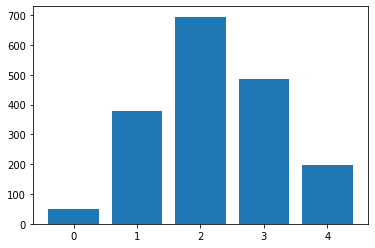

In [66]:
plt.bar(*zip(*dict(Counter(human1_score)).items()))
plt.show()

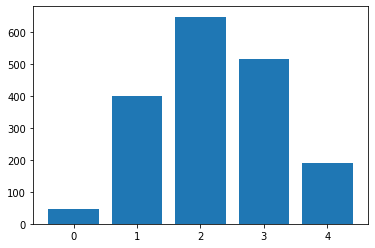

In [67]:
plt.bar(*zip(*dict(Counter(human2_score)).items()))
plt.show()

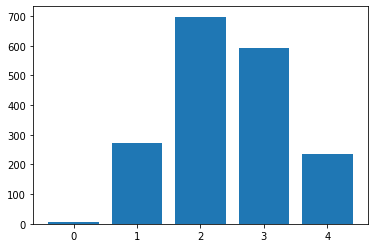

In [68]:
plt.bar(*zip(*dict(Counter(model_score)).items()))
plt.show()

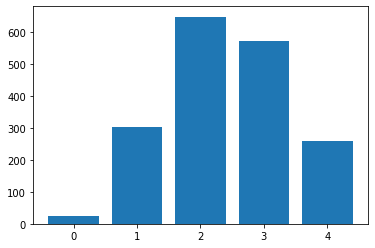

In [69]:
plt.bar(*zip(*dict(Counter(y)).items()))
plt.show()

c:\users\20167947\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


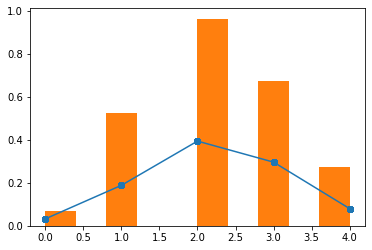

In [70]:
import pylab as pl
import scipy.stats as stats

fit = stats.norm.pdf(a, np.mean(a), np.std(a))  #this is a fitting indeed

pl.plot(a,fit,'-o')

pl.hist(a,normed=True)      #use this to draw histogram of your data

pl.show() 

## Studying model behaviour

### 1. Answer Length

In [14]:
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap5')
answer_length = x[:,0]

In [15]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(answer_length, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Answer Length)' % corr)
corr, _ = pearsonr(answer_length, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Answer Length)' % corr)
corr, _ = pearsonr(answer_length, model_score)
print('Pearson\'s correlation Model : %.3f  (Answer Length)' % corr)

Pearson's correlation Human-1 : 0.793  (Answer Length)
Pearson's correlation Human-2 : 0.790  (Answer Length)
Pearson's correlation Model : 0.885  (Answer Length)


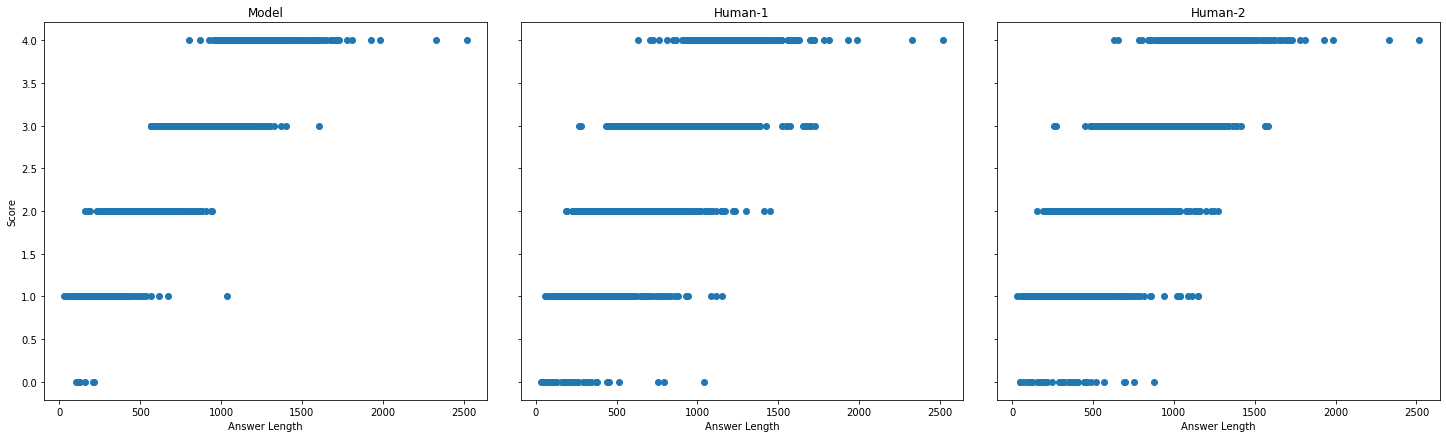

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(answer_length, model_score)
axs[0].set_title('Model')
axs[1].scatter(answer_length, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(answer_length, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Answer Length', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.savefig('answer_length.png', bbox_inches="tight")

### 2. Word Counts

In [16]:
word_count = x[:,1]

In [17]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(word_count, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Word Count)' % corr)
corr, _ = pearsonr(word_count, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Word Count)' % corr)
corr, _ = pearsonr(word_count, model_score)
print('Pearson\'s correlation Model : %.3f  (Word Count)' % corr)

Pearson's correlation Human-1 : 0.789  (Word Count)
Pearson's correlation Human-2 : 0.784  (Word Count)
Pearson's correlation Model : 0.881  (Word Count)


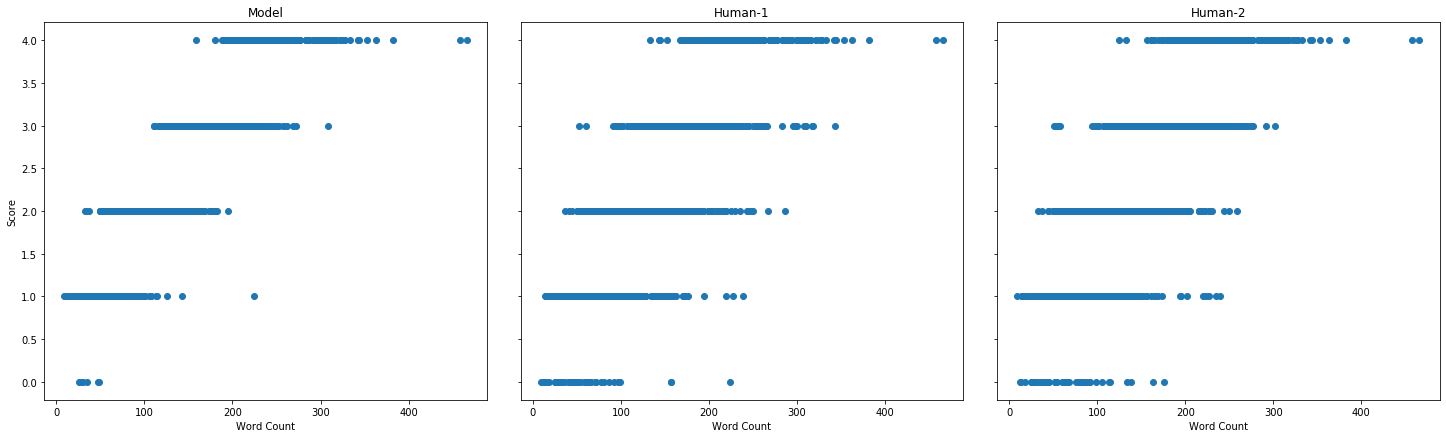

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(word_count, model_score)
axs[0].set_title('Model')
axs[1].scatter(word_count, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(word_count, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Word Count', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('word_count.png', bbox_inches="tight")

### 3. Average Word Length

In [20]:
avg_word_length = x[:,2]

In [21]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(avg_word_length, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Average Word Length)' % corr)
corr, _ = pearsonr(avg_word_length, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Average Word Length)' % corr)
corr, _ = pearsonr(avg_word_length, model_score)
print('Pearson\'s correlation Model : %.3f  (Average Word Length)' % corr)

Pearson's correlation Human-1 : 0.560  (Average Word Length)
Pearson's correlation Human-2 : 0.561  (Average Word Length)
Pearson's correlation Model : 0.605  (Average Word Length)


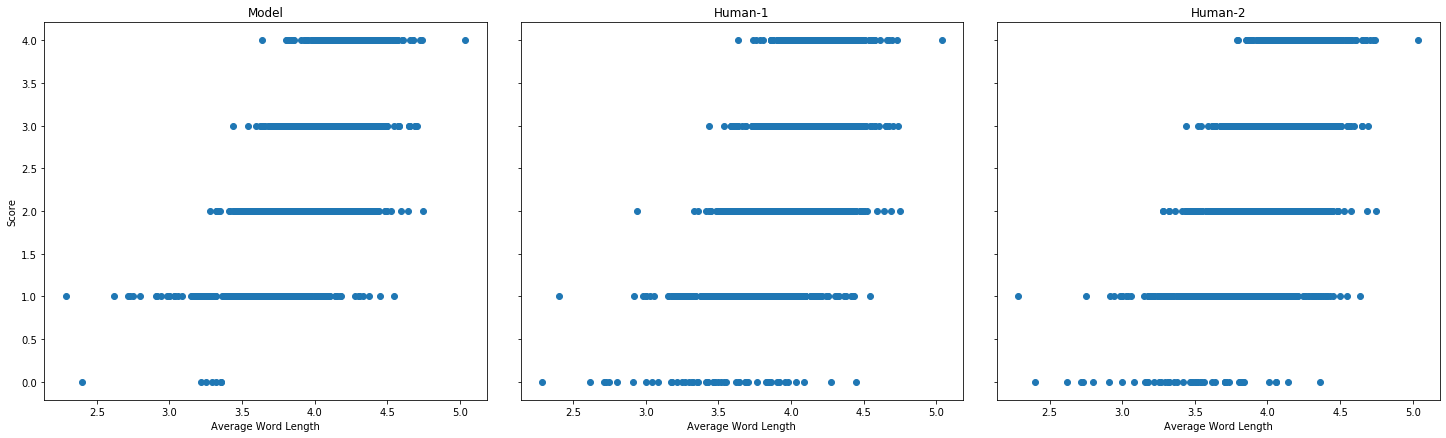

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(avg_word_length, model_score)
axs[0].set_title('Model')
axs[1].scatter(avg_word_length, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(avg_word_length, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Average Word Length', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('avg_word_length.png', bbox_inches="tight")

### 4. Good n-gram

In [22]:
good_ngram = x[:,3]

In [23]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(good_ngram, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Good n-gram)' % corr)
corr, _ = pearsonr(good_ngram, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Good n-gram)' % corr)
corr, _ = pearsonr(good_ngram, model_score)
print('Pearson\'s correlation Model : %.3f  (Good n-gram)' % corr)

Pearson's correlation Human-1 : 0.789  (Good n-gram)
Pearson's correlation Human-2 : 0.784  (Good n-gram)
Pearson's correlation Model : 0.881  (Good n-gram)


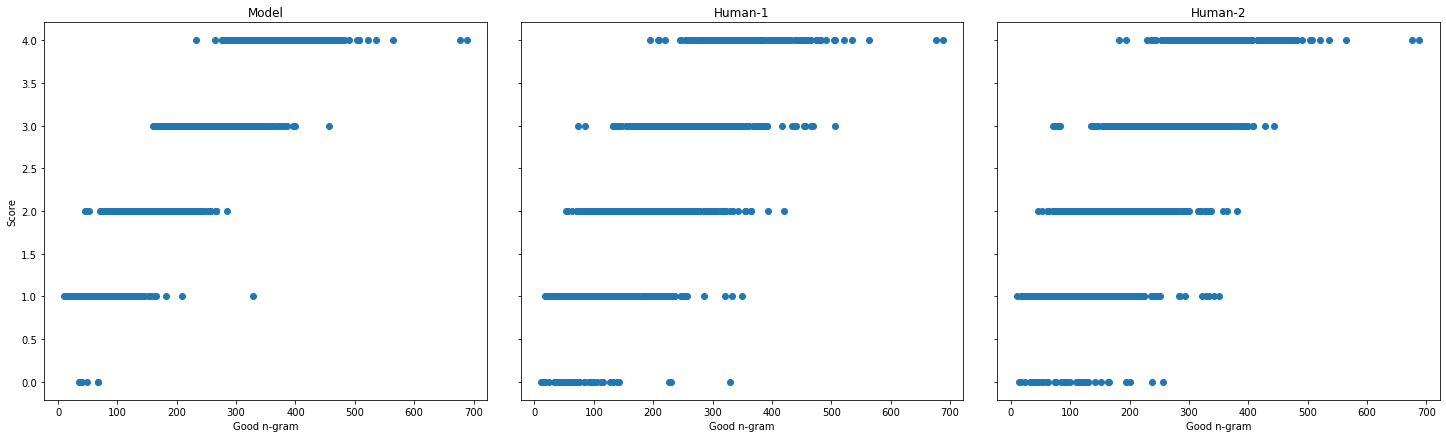

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(good_ngram, model_score)
axs[0].set_title('Model')
axs[1].scatter(good_ngram, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(good_ngram, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Good n-gram', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('good_ngram.png', bbox_inches="tight")

### 5. Prompt Overlap

In [24]:
prompt_overlap = x[:,4]

Pearson's correlation Human-1 : 0.797  (Prompt Overlap)
Pearson's correlation Human-2 : 0.790  (Prompt Overlap)
Pearson's correlation Model : 0.887  (Prompt Overlap)


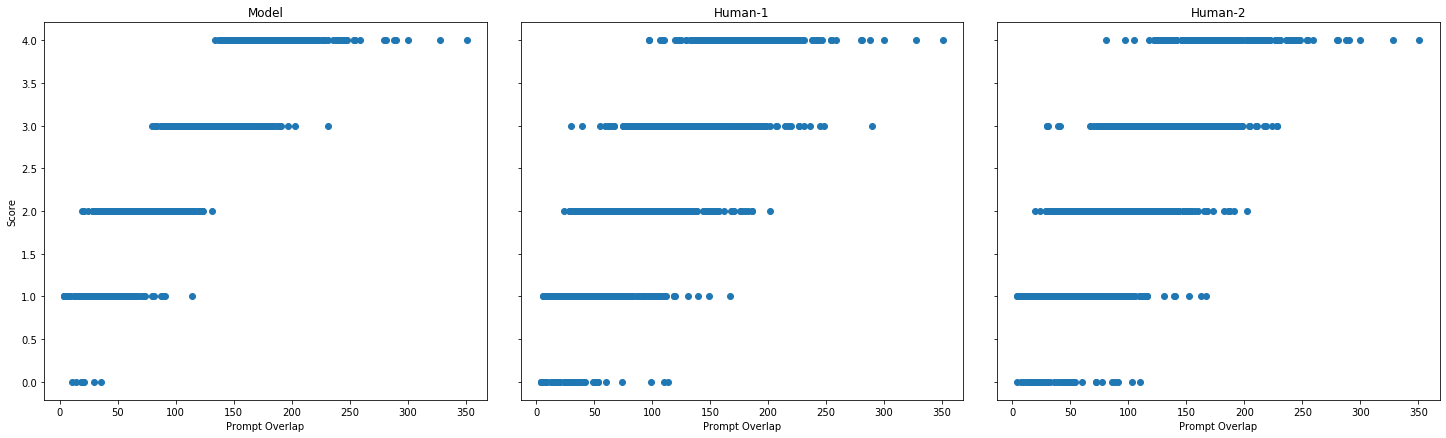

In [25]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(prompt_overlap, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Prompt Overlap)' % corr)
corr, _ = pearsonr(prompt_overlap, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Prompt Overlap)' % corr)
corr, _ = pearsonr(prompt_overlap, model_score)
print('Pearson\'s correlation Model : %.3f  (Prompt Overlap)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(prompt_overlap, model_score)
axs[0].set_title('Model')
axs[1].scatter(prompt_overlap, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(prompt_overlap, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Overlap', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('prompt_overlap.png', bbox_inches="tight")

### 6. Prompt Overlap (synonym)

In [26]:
prompt_overlap_syn = x[:,5]

Pearson's correlation Human-1 : 0.759  (Prompt Overlap Synonym)
Pearson's correlation Human-2 : 0.748  (Prompt Overlap Synonym)
Pearson's correlation Model : 0.850  (Prompt Overlap Synonym)


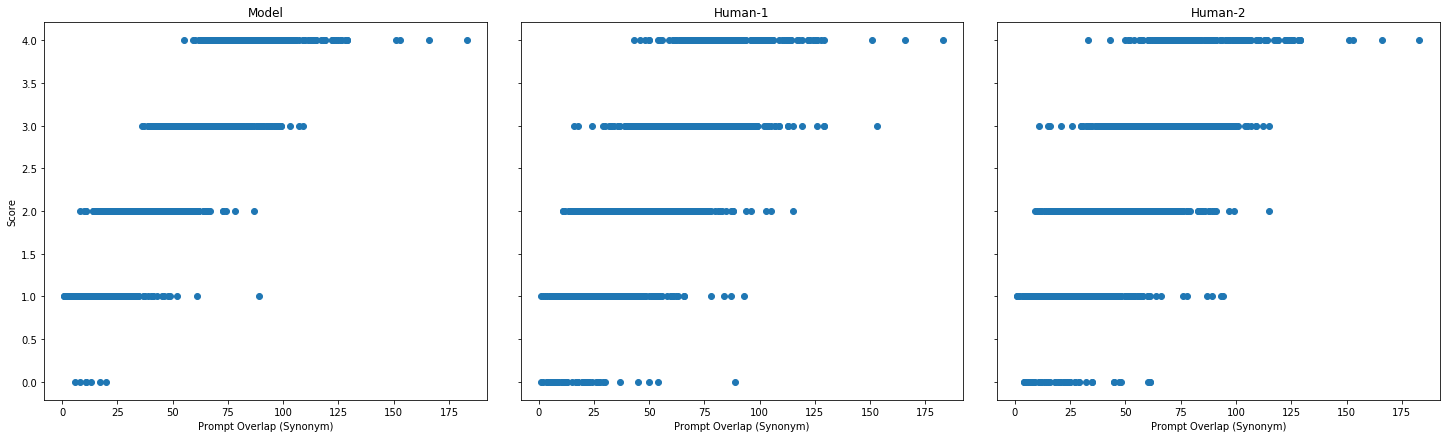

In [27]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(prompt_overlap_syn, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Prompt Overlap Synonym)' % corr)
corr, _ = pearsonr(prompt_overlap_syn, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Prompt Overlap Synonym)' % corr)
corr, _ = pearsonr(prompt_overlap_syn, model_score)
print('Pearson\'s correlation Model : %.3f  (Prompt Overlap Synonym)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(prompt_overlap_syn, model_score)
axs[0].set_title('Model')
axs[1].scatter(prompt_overlap_syn, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(prompt_overlap_syn, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Overlap (Synonym)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('prompt_overlap_syn.png', bbox_inches="tight")

### 7. Punctuation Counts

In [28]:
punc_count = x[:,6]

Pearson's correlation Human-1 : 0.687  (Punctuation Count)
Pearson's correlation Human-2 : 0.694  (Punctuation Count)
Pearson's correlation Model : 0.766  (Punctuation Count)


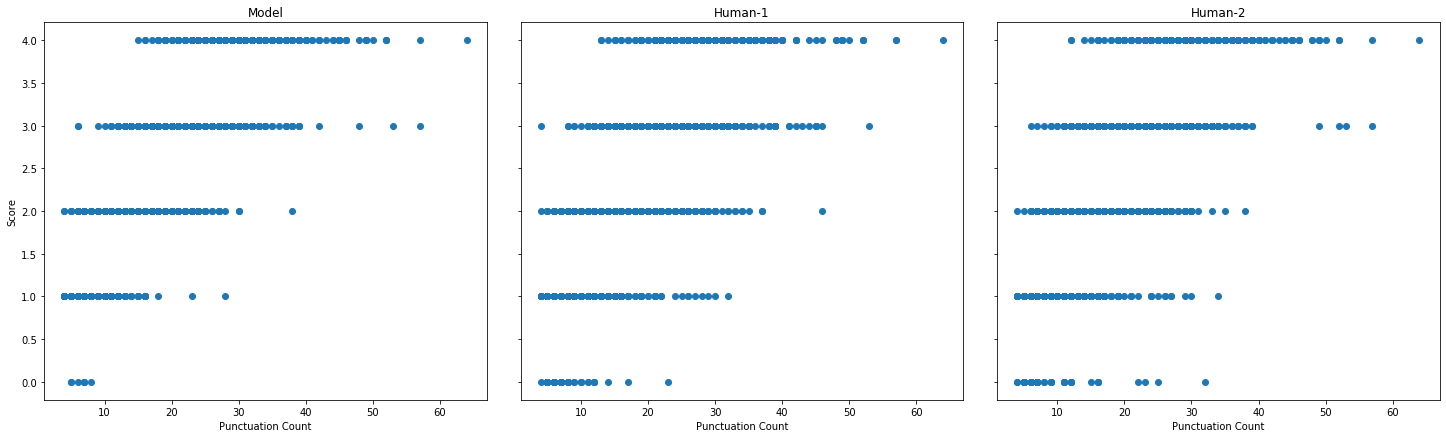

In [29]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(punc_count, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Punctuation Count)' % corr)
corr, _ = pearsonr(punc_count, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Punctuation Count)' % corr)
corr, _ = pearsonr(punc_count, model_score)
print('Pearson\'s correlation Model : %.3f  (Punctuation Count)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(punc_count, model_score)
axs[0].set_title('Model')
axs[1].scatter(punc_count, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(punc_count, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Punctuation Count', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('punc_count.png', bbox_inches="tight")

### 8. Spelling Error

In [30]:
spelling_error = x[:,7]

In [31]:
spelling_error

array([0.04375   , 0.03703704, 0.07142857, ..., 0.06806283, 0.05333333,
       0.04716981])

Pearson's correlation Human-1 : -0.253  (Spelling Error)
Pearson's correlation Human-2 : -0.259  (Spelling Error)
Pearson's correlation Model : -0.271  (Spelling Error)


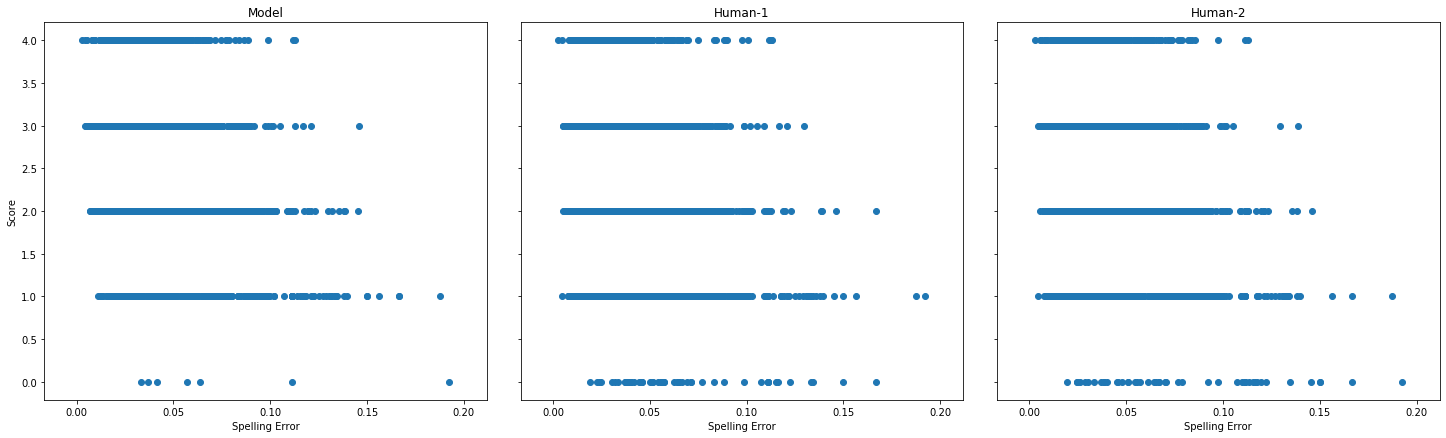

In [32]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(spelling_error, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Spelling Error)' % corr)
corr, _ = pearsonr(spelling_error, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Spelling Error)' % corr)
corr, _ = pearsonr(spelling_error, model_score)
print('Pearson\'s correlation Model : %.3f  (Spelling Error)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(spelling_error, model_score)
axs[0].set_title('Model')
axs[1].scatter(spelling_error, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(spelling_error, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Spelling Error', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('spelling_error.png', bbox_inches="tight")

### 9. Unique Words

In [33]:
unique_words = x[:,8]
unique_words

array([75., 99., 72., ..., 93., 79., 59.])

Pearson's correlation Human-1 : 0.781  (Unique Words)
Pearson's correlation Human-2 : 0.775  (Unique Words)
Pearson's correlation Model : 0.873  (Unique Words)


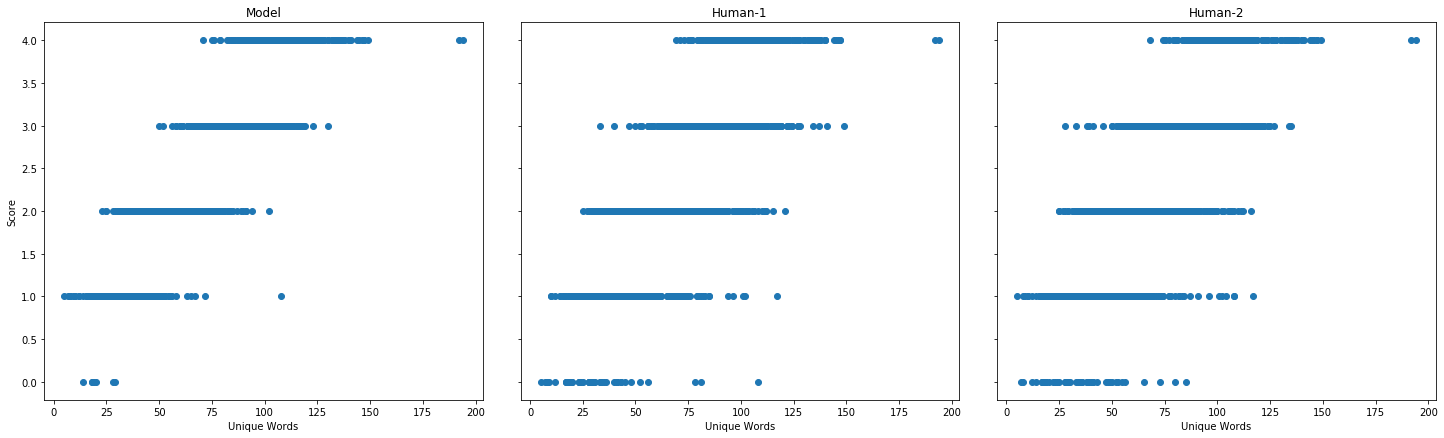

In [34]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(unique_words, human1_score)
print('Pearson\'s correlation Human-1 : %.3f  (Unique Words)' % corr)
corr, _ = pearsonr(unique_words, human2_score)
print('Pearson\'s correlation Human-2 : %.3f  (Unique Words)' % corr)
corr, _ = pearsonr(unique_words, model_score)
print('Pearson\'s correlation Model : %.3f  (Unique Words)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(unique_words, model_score)
axs[0].set_title('Model')
axs[1].scatter(unique_words, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(unique_words, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Unique Words', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('unique_words.png', bbox_inches="tight")

### 10. Prompt Similarity (SBert)

In [35]:
sbert_similarity = x[:,9]
sbert_similarity

array([0.87238002, 0.87245715, 0.89852846, ..., 0.85635328, 0.89876992,
       0.88150203])

Pearson's correlation Human-1: 0.573 (Prompt Similarity (SBert))
Pearson's correlation Human-2: 0.551 (Prompt Similarity (SBert))
Pearson's correlation Model: 0.620 (Prompt Similarity (SBert))


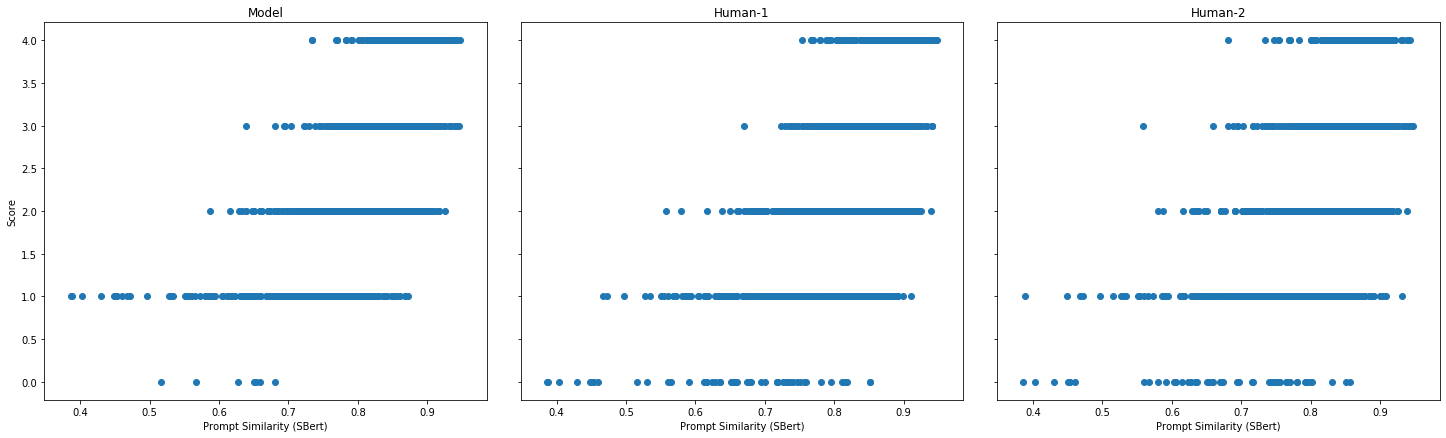

In [36]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(sbert_similarity, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Prompt Similarity (SBert))' % corr)
corr, _ = pearsonr(sbert_similarity, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Prompt Similarity (SBert))' % corr)
corr, _ = pearsonr(sbert_similarity, model_score)
print('Pearson\'s correlation Model: %.3f (Prompt Similarity (SBert))' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(sbert_similarity, model_score)
axs[0].set_title('Model')
axs[1].scatter(sbert_similarity, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(sbert_similarity, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Similarity (SBert)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('sbert_similarity.png', bbox_inches="tight")

### 11. Prompt Similarity (BOW)

In [37]:
bow_similarity = x[:,10]
bow_similarity

array([0.81706252, 0.68457346, 0.55913954, ..., 0.59249001, 0.72293681,
       0.59104479])

Pearson's correlation Human-1: 0.361 (Prompt Similarity (BOW))
Pearson's correlation Human-2: 0.351 (Prompt Similarity (BOW))
Pearson's correlation Model: 0.428 (Prompt Similarity (BOW))


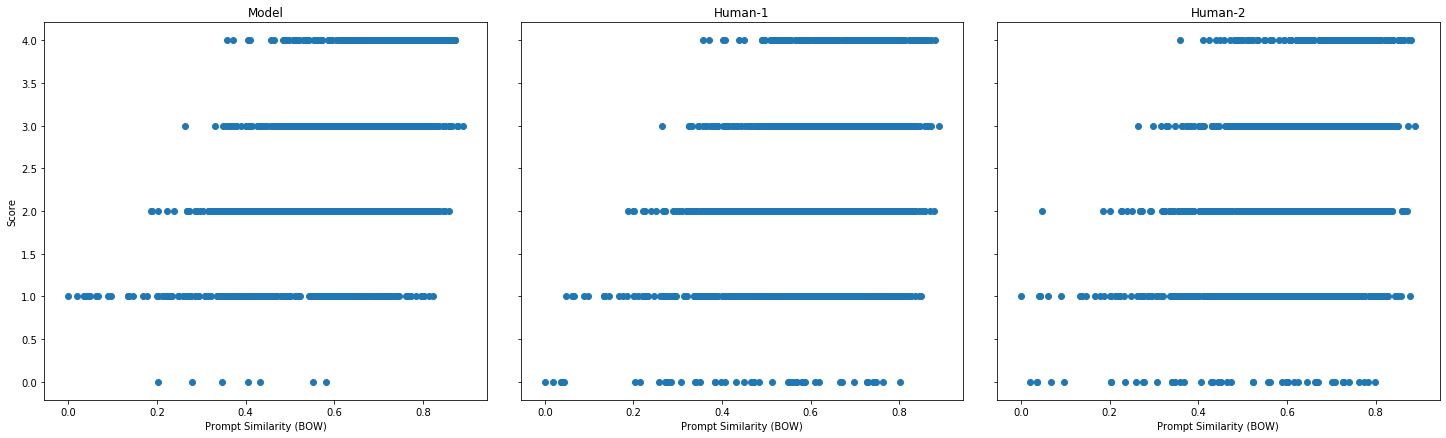

In [38]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(bow_similarity, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Prompt Similarity (BOW))' % corr)
corr, _ = pearsonr(bow_similarity, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Prompt Similarity (BOW))' % corr)
corr, _ = pearsonr(bow_similarity, model_score)
print('Pearson\'s correlation Model: %.3f (Prompt Similarity (BOW))' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(bow_similarity, model_score)
axs[0].set_title('Model')
axs[1].scatter(bow_similarity, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(bow_similarity, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Prompt Similarity (BOW)', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('bow_similarity.png', bbox_inches="tight")

### 12. Language Error

In [39]:
lang_error = x[:,11]
lang_error

array([0.00919842, 0.00643087, 0.01837672, ..., 0.02103049, 0.0132626 ,
       0.01136364])

Pearson's correlation Human-1: -0.082 (Language Error)
Pearson's correlation Human-2: -0.090 (Language Error)
Pearson's correlation Model: -0.100 (Language Error)


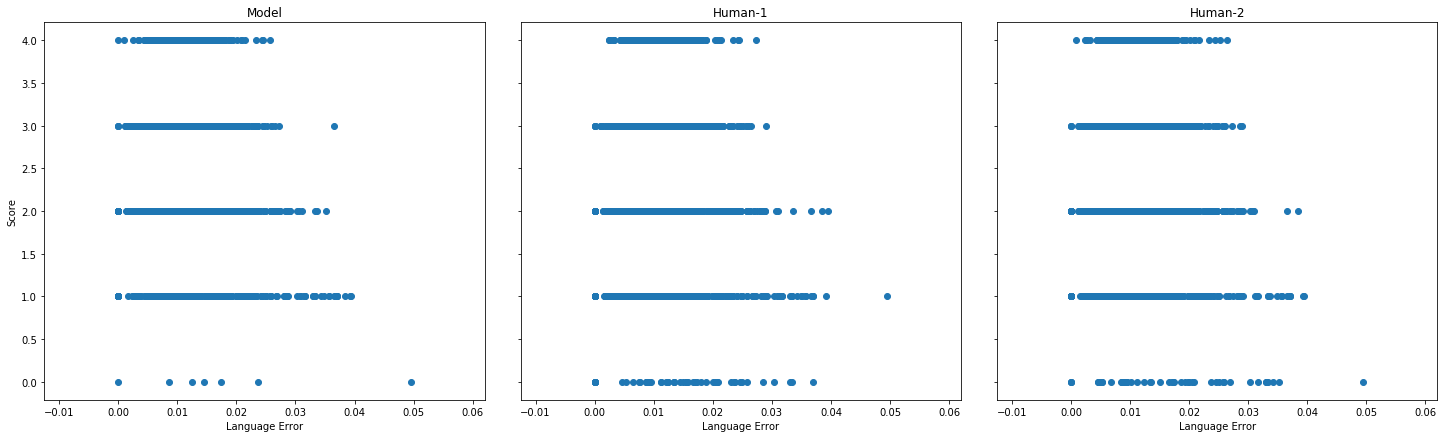

In [40]:
# calculate Pearson's correlation
from scipy.stats import pearsonr

corr, _ = pearsonr(lang_error, human1_score)
print('Pearson\'s correlation Human-1: %.3f (Language Error)' % corr)
corr, _ = pearsonr(lang_error, human2_score)
print('Pearson\'s correlation Human-2: %.3f (Language Error)' % corr)
corr, _ = pearsonr(lang_error, model_score)
print('Pearson\'s correlation Model: %.3f (Language Error)' % corr)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(lang_error, model_score)
axs[0].set_title('Model')
axs[1].scatter(lang_error, human1_score)
axs[1].set_title('Human-1')
axs[2].scatter(lang_error, human2_score)
axs[2].set_title('Human-2')
fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Language Error', ylabel='Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.savefig('lang_error.png', bbox_inches="tight")